In [1]:
file_path = 'results_rango_lora.csv'
data = pd.read_csv(file_path)
data = data.sort_values(by='Lora_Rank')

NameError: name 'pd' is not defined

In [2]:
data.columns

NameError: name 'data' is not defined

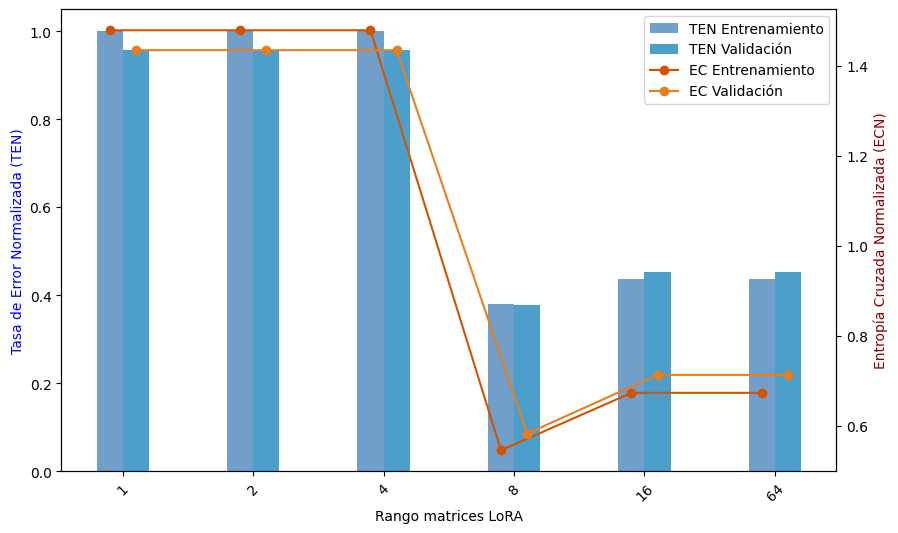

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = 'results_rango_lora.csv'
data = pd.read_csv(file_path)
data = data.sort_values(by='Lora_Rank')

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.20  # Reduce the width to create space between groups

# Positions for bars on the x-axis
indices = np.arange(len(data['Lora_Rank'].unique()))
r0 = indices - bar_width/2
r1 = indices + bar_width/2

# Normalize Error Rates for plotting
data['Error Rate Entrenamiento'] = 1 - data['Accuracy Entrenamiento']
data['Error Rate Validación'] = 1 - data['Accuracy Validación']
max_error = max(data['Error Rate Entrenamiento'].max(), data['Error Rate Validación'].max())
data['TEN Entrenamiento'] = data['Error Rate Entrenamiento'] / max_error
data['TEN Validación'] = data['Error Rate Validación'] / max_error

# Plot TEN on the primary y-axis
ax1.bar(r0, data.groupby('Lora_Rank')['TEN Entrenamiento'].mean(), color='#729eca', width=bar_width, label='TEN Entrenamiento')
ax1.bar(r1, data.groupby('Lora_Rank')['TEN Validación'].mean(), color='#4c9fca', width=bar_width, label='TEN Validación')
ax1.set_ylabel('Tasa de Error Normalizada (TEN)', color='blue')
ax1.set_xlabel('Rango matrices LoRA')
ax1.set_xticks(indices)
ax1.set_xticklabels(data['Lora_Rank'].unique(), rotation=45)

# Create a second y-axis for the EC
ax2 = ax1.twinx()
ax2.plot(r0, data.groupby('Lora_Rank')['EC Entrenamiento'].mean(), color='#d35400', marker='o', linestyle='-', label='EC Entrenamiento')
ax2.plot(r1, data.groupby('Lora_Rank')['EC Validación'].mean(), color='#e67e22', marker='o', linestyle='-', label='EC Validación')
ax2.set_ylabel('Entropía Cruzada Normalizada (ECN)', color='darkred')  # New label for the right y-axis

# Legend combining all bars
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

#plt.title('Comparación de TEN y EC por Rango de Matrices LoRA')
plt.savefig('plots/TEN_and_EC_by_LoRa_ranks.png')
plt.show()

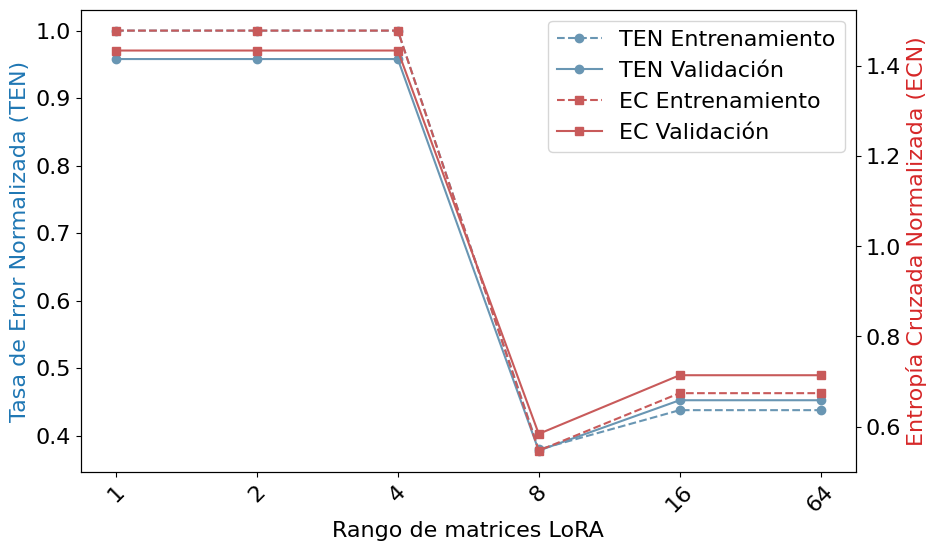

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = 'results_rango_lora.csv'
data = pd.read_csv(file_path)
data = data.sort_values(by='Lora_Rank')

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Positions for points on the x-axis
indices = np.arange(len(data['Lora_Rank'].unique()))

# Normalize Error Rates for plotting
data['Error Rate Entrenamiento'] = 1 - data['Accuracy Entrenamiento']
data['Error Rate Validación'] = 1 - data['Accuracy Validación']
max_error = max(data['Error Rate Entrenamiento'].max(), data['Error Rate Validación'].max())
data['TEN Entrenamiento'] = data['Error Rate Entrenamiento'] / max_error
data['TEN Validación'] = data['Error Rate Validación'] / max_error

font = 16

# Plot TEN on the primary y-axis using lines
ax1.plot(indices, data.groupby('Lora_Rank')['TEN Entrenamiento'].mean(), color='#6996b3', marker='o', linestyle='--', label='TEN Entrenamiento')
ax1.plot(indices, data.groupby('Lora_Rank')['TEN Validación'].mean(), color='#6996b3', marker='o', linestyle='-', label='TEN Validación')
ax1.set_ylabel('Tasa de Error Normalizada (TEN)', color='#1f77b4', fontsize=font)
ax1.set_xlabel('Rango de matrices LoRA', fontsize=font)
ax1.set_xticks(indices)
ax1.set_xticklabels(data['Lora_Rank'].unique(), rotation=45, fontsize=font)
ax1.tick_params(axis='both', labelsize=font)  # Ajustar tamaño de ticks para x e y

# Create a second y-axis for the EC
ax2 = ax1.twinx()
ax2.plot(indices, data.groupby('Lora_Rank')['EC Entrenamiento'].mean(), color='#c85a5a', marker='s', linestyle='--', label='EC Entrenamiento')
ax2.plot(indices, data.groupby('Lora_Rank')['EC Validación'].mean(), color='#c85a5a', marker='s', linestyle='-', label='EC Validación')
ax2.set_ylabel('Entropía Cruzada Normalizada (ECN)', color='#d62728', fontsize=font)
ax2.tick_params(axis='both', labelsize=font)  # Ajustar tamaño de ticks para x e y

# Legend combining all plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=font)

plt.savefig('plots/TEN_and_EC_by_LoRa_ranks.png')
plt.show()

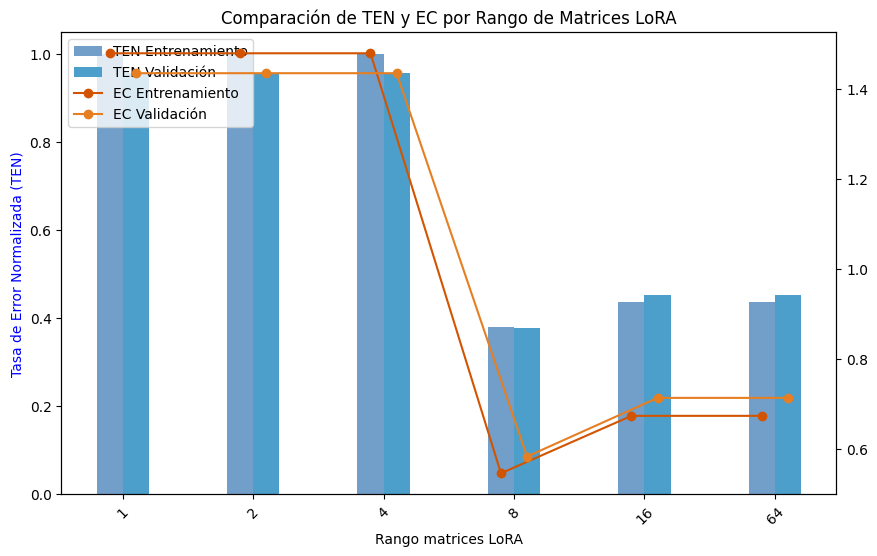

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = 'results_rango_lora.csv'
data = pd.read_csv(file_path)
data = data.sort_values(by='Lora_Rank')

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.20  # Reduce the width to create space between groups
group_width = bar_width * 2  # Adjust to ensure no overlap

# Positions for bars on the x-axis
indices = np.arange(len(data['Lora_Rank'].unique()))
r0 = indices - bar_width/2
r1 = indices + bar_width/2

# Normalize Error Rates for plotting
data['Error Rate Entrenamiento'] = 1 - data['Accuracy Entrenamiento']
data['Error Rate Validación'] = 1 - data['Accuracy Validación']
max_error = max(data['Error Rate Entrenamiento'].max(), data['Error Rate Validación'].max())
data['TEN Entrenamiento'] = data['Error Rate Entrenamiento'] / max_error
data['TEN Validación'] = data['Error Rate Validación'] / max_error

# Plot TEN on the primary y-axis
ax1.bar(r0, data.groupby('Lora_Rank')['TEN Entrenamiento'].mean(), color='#729eca', width=bar_width, label='TEN Entrenamiento')
ax1.bar(r1, data.groupby('Lora_Rank')['TEN Validación'].mean(), color='#4c9fca', width=bar_width, label='TEN Validación')
ax1.set_ylabel('Tasa de Error Normalizada (TEN)', color='blue')
ax1.set_xlabel('Rango matrices LoRA')
ax1.set_xticks(indices)
ax1.set_xticklabels(data['Lora_Rank'].unique(), rotation=45)

# Create a second y-axis for the EC
ax2 = ax1.twinx()
ax2.plot(r0, data.groupby('Lora_Rank')['EC Entrenamiento'].mean(), color='#d35400', marker='o', linestyle='-', label='EC Entrenamiento')
ax2.plot(r1, data.groupby('Lora_Rank')['EC Validación'].mean(), color='#e67e22', marker='o', linestyle='-', label='EC Validación')
# Legend combining all bars
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Comparación de TEN y EC por Rango de Matrices LoRA')
plt.savefig('TEN_and_EC_by_LoRa_ranks.png')
plt.show()

In [6]:
import pandas as pd
import os
import glob
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
from results import *

def load_and_process_csv(filepath, set_name):
    """Carga y procesa un archivo CSV, eliminando columnas innecesarias."""
    df = pd.read_csv(filepath)
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)
    df['Type'] = set_name
    return df

def load_yaml_configuration(filepath):
    """Carga la configuración de un archivo YAML."""
    with open(filepath, 'r') as file:
        params = yaml.safe_load(file)
    params['model'] = params['model'].replace("/", "-")
    return params

def find_yaml_file(directory):
    """Encuentra y valida un archivo YAML en el directorio especificado."""
    yaml_files = glob.glob(os.path.join(directory, '*.yaml'))
    if not yaml_files:
        raise FileNotFoundError("No se encontró ningún archivo YAML en el directorio.")
    if len(yaml_files) > 1:
        raise RuntimeError("Se encontraron múltiples archivos YAML en el directorio. Asegúrate de tener solo uno.")
    return yaml_files[0]


../experimentos/output/mistralai/Mistral-7B-v0.1/socialiqa/Base/5000
../experimentos/output/mistralai/Mistral-7B-v0.1/hellaswag/2/1/5000/1e-5
../experimentos/output/microsoft/phi-1.5/socialiqa/16/4/5000/1e-5
../experimentos/output/microsoft/phi-1.5/socialiqa/16/5/5000/1e-5/adapters copy
logits or targets están vacíos
logits or targets están vacíos
logits or targets están vacíos
../experimentos/output/microsoft/phi-1.5/socialiqa/8/4/5000/1e-5
../experimentos/output/microsoft/phi-1.5/socialiqa/24/4/5000/1e-5
../experimentos/output/microsoft/phi-1.5/socialiqa/Base/5000
../experimentos/output/microsoft/phi-1.5/hellaswag/20/5/1000/1e-5
../experimentos/output/microsoft/phi-1.5/hellaswag/16/5/2000/1e-4
../experimentos/output/microsoft/phi-1.5/hellaswag/16/5/2000/1e-5
../experimentos/output/microsoft/phi-1.5/hellaswag/16/5/1001/1e-5
../experimentos/output/microsoft/phi-1.5/hellaswag/8/5/5000/1e-4
../experimentos/output/microsoft/phi-1.5/hellaswag/8/5/1000/1e-5
../experimentos/output/microsoft/

### 2. Función para combinar y filtrar DataFrames


In [7]:
def combine_and_filter_dataframes(train_df, val_df):
    """Combina y filtra DataFrames de entrenamiento y validación."""
    val_df.rename(columns={'Val': 'Loss'}, inplace=True)
    combined_df = pd.concat([train_df, val_df])
    filtered_df = combined_df[combined_df['Loss'] <= 1]
    return filtered_df


### 3. Función para graficar los resultados


In [8]:
def plot_data(data, title, save_path):
    """Grafica y guarda los datos de pérdida de entrenamiento y validación."""
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Iteration', y='Loss', hue='Type', style='Type', markers=True, dashes=False)
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend(title='Dataset')
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

### 4. Función principal que usa las funciones definidas


In [9]:
root_directory = '../output/'
ignore_folders = ['adapters', 'adapters_best_val', 'tokenizer', 'resultados con adapters',"socialiqa_debug"]

leaf_dirs = list_leaf_directories(root_directory, ignore_folders)
leaf_dirs

for dir in leaf_dirs:
    #print("Procesando directorio:", dir)
    info_experimento = parse_path(dir)
    info_experimento.keys()
    if info_experimento["Base/Fine-tuning"]=="Fine-tuning":
        

SyntaxError: incomplete input (3238445991.py, line 12)

In [ ]:
info_experimento.keys()

dict_keys(['Empresa', 'Modelo', 'Dataset', 'Capas LoRa', 'Tamaño batch', 'Learning rate', 'Base/Fine-tuning', 'Adapter'])

In [ ]:
from utils import *
def main():

    directories = list_leaf_directories
        
    dataframes = {}
    
    for directory in directories:
        for a_set in ["Train", "Val"]:
            file_path = os.path.join(directory, f"{a_set}_loss.csv")
            dataframes[f'{a_set}_loss'] = load_and_process_csv(file_path, a_set)

        yaml_file_path = find_yaml_file(directory)
        params = load_yaml_configuration(yaml_file_path)
        model_name = params['model']
        lora_layers = params['lora-layers']
        batch_size = params['batch-size']
        
        if lora_layers and batch_size:
            title = f'{model_name} con {lora_layers} LoRA Layers - Training vs. Validation Loss Over Iterations (Loss ≤ 1)'
        else:
            title = f'{model_name} base - Training vs. Validation Loss Over Iterations (Loss ≤ 1)'
        
        save_path = os.path.join(directory, f"{model_name}_with_{lora_layers}_LoRA_Layers_Training_vs_Validation_Loss.png")

        filtered_data = combine_and_filter_dataframes(dataframes['Train_loss'], dataframes['Val_loss'])
        plot_data(filtered_data, title, save_path)


In [ ]:
import os

def main():
    directories = [
        "../output/microsoft/phi-1.5/socialiqa_avance/8/4",
        "../output/microsoft/phi-1.5/socialiqa_avance/8/8",
        "../output/microsoft/phi-1.5/socialiqa_avance/8/16",
    ]
    
    dataframes = {}
    
    for directory in directories:
        print(f"Processing directory: {directory}")
        for a_set in ["Train", "Val"]:
            file_path = os.path.join(directory, f"{a_set}_loss.csv")
            if not os.path.exists(file_path):
                print(f"Warning: File {file_path} does not exist. Skipping.")
                continue
            dataframes[f'{a_set}_loss'] = load_and_process_csv(file_path, a_set)
            print(f"Loaded and processed {file_path}")

        try:
            yaml_file_path = find_yaml_file(directory)
            params = load_yaml_configuration(yaml_file_path)
        except Exception as e:
            print(f"Error loading YAML configuration: {e}")
            continue
        
        model_name = params.get('model', 'Unknown Model')
        lora_layers = params.get('lora-layers', 'No LoRA Layers')
        batch_size = params.get('batch-size', 'No Batch Size')

        title = f'{model_name} with {lora_layers} LoRA Layers y batch de {batch_size} - Training vs. Validation Loss Over Iterations (Loss ≤ 1)'
        
        save_path = os.path.join(os.getcwd(), f"{title}.png")
        if 'Train_loss' in dataframes and 'Val_loss' in dataframes:
            filtered_data = combine_and_filter_dataframes(dataframes['Train_loss'], dataframes['Val_loss'])
            print(f"Plotting data for {directory}")
            plot_data(filtered_data, title, save_path)
        else:
            print(f"DataFrames for training or validation are missing in {directory}")

        # Reset dataframes dictionary for the next directory
        dataframes = {}

if __name__ == "__main__":
    main()


Processing directory: ../output/microsoft/phi-1.5/socialiqa_avance/8/4
Error loading YAML configuration: No se encontró ningún archivo YAML en el directorio.
Processing directory: ../output/microsoft/phi-1.5/socialiqa_avance/8/8
Error loading YAML configuration: No se encontró ningún archivo YAML en el directorio.
Processing directory: ../output/microsoft/phi-1.5/socialiqa_avance/8/16
Error loading YAML configuration: No se encontró ningún archivo YAML en el directorio.


In [ ]:
for dir in leaf_dirs:
    try:
        print("Procesando directorio:", dir)
        info_experimento = parse_path(dir)

        # Intenta cargar los logits; si el archivo no existe, captura la excepción y continúa
        try:
            logits = np.load(dir + "/test_all_logits.npy")
        except FileNotFoundError:
            print(f"No se pudo encontrar 'test_all_logits.npy' en {dir}, saltando este directorio.")
            continue  # Salta al próximo directorio en el bucle

        # Proceso similar para 'targets'
        try:
            targets = np.load(dir + "/test_all_targets.npy")
        except FileNotFoundError:
            print(f"No se pudo encontrar 'test_all_targets.npy' en {dir}, saltando este directorio.")
            continue

        # Si ambos archivos existen, procede con el procesamiento
        np.bincount(targets, minlength=3)
        values, counts = np.unique(targets, return_counts=True)
        counts / sum(counts)

        predictions = np.argmax(logits, axis=1)
        accuracy = accuracy_score(targets, predictions)

        logits_sf = mx.softmax(mx.array(logits), axis=1)
        indices = np.unique(targets)
        selected_logits = np.take(logits_sf, indices, axis=1)
        priors_to_targets = np.sum(selected_logits, axis=1).mean()

        relevant_logits = logits[:, indices]
        predictions = np.argmax(relevant_logits, axis=1)

        index_to_position = {index: pos for pos, index in enumerate(indices)}
        mapped_targets = np.array([index_to_position[target] for target in targets if target in index_to_position])
        accuracy_restricted = accuracy_score(mapped_targets, predictions)

        cross_entropy = nn.losses.cross_entropy(mx.array(logits), mx.array(targets), reduction="mean").item()
        priors = np.bincount(targets, minlength=logits.shape[1]) / targets.shape[0]
        priors = np.repeat(priors.reshape(1, -1), len(targets), axis=0)
        cross_entropy_priors = nn.losses.cross_entropy(mx.array(np.log(priors)), mx.array(targets), reduction="mean").item()

        # Preparar un DataFrame temporal con los resultados para este directorio
        temp_df = pd.DataFrame({
            "Empresa": info_experimento["Empresa"],
            "Modelo": info_experimento["Modelo"],
            "Capas LoRa": info_experimento["Capas LoRa"],
            "Tamaño batch": info_experimento["Tamaño batch"],
            "Learning rate": info_experimento["Learning rate"],
            "Adapter": "Last",
            "Accuracy": [accuracy],
            "Proportion Targets in Softmax": [priors_to_targets],
            "Accuracy restringido": [accuracy_restricted],
            "Entropía cruzada": [cross_entropy],
            "Entropía cruzada normalizada": [cross_entropy / cross_entropy_priors],
        })

        # Concatenar el DataFrame temporal al principal
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

    except Exception as e:
        print(f"Ocurrió un error inesperado procesando el directorio {dir}: {str(e)}")


NameError: name 'leaf_dirs' is not defined

In [ ]:
for dir in leaf_dirs:
    try:
        print("Procesando directorio:", dir)
        info_experimento = parse_path(dir)

        # Intenta cargar los logits; si el archivo no existe, captura la excepción y continúa
        try:
            logits = np.load(dir + "/test_all_logits.npy")
        except FileNotFoundError:
            print(f"No se pudo encontrar 'test_all_logits.npy' en {dir}, saltando este directorio.")
            continue  # Salta al próximo directorio en el bucle

        # Proceso similar para 'targets'
        try:
            targets = np.load(dir + "/test_all_targets.npy")
        except FileNotFoundError:
            print(f"No se pudo encontrar 'test_all_targets.npy' en {dir}, saltando este directorio.")
            continue

        # Si ambos archivos existen, procede con el procesamiento
        np.bincount(targets, minlength=3)
        values, counts = np.unique(targets, return_counts=True)
        counts / sum(counts)

        predictions = np.argmax(logits, axis=1)
        accuracy = accuracy_score(targets, predictions)

        logits_sf = mx.softmax(mx.array(logits), axis=1)
        indices = np.unique(targets)
        selected_logits = np.take(logits_sf, indices, axis=1)
        priors_to_targets = np.sum(selected_logits, axis=1).mean()

        relevant_logits = logits[:, indices]
        predictions = np.argmax(relevant_logits, axis=1)

        index_to_position = {index: pos for pos, index in enumerate(indices)}
        mapped_targets = np.array([index_to_position[target] for target in targets if target in index_to_position])
        accuracy_restricted = accuracy_score(mapped_targets, predictions)

        cross_entropy = nn.losses.cross_entropy(mx.array(logits), mx.array(targets), reduction="mean").item()
        priors = np.bincount(targets, minlength=logits.shape[1]) / targets.shape[0]
        priors = np.repeat(priors.reshape(1, -1), len(targets), axis=0)
        cross_entropy_priors = nn.losses.cross_entropy(mx.array(np.log(priors)), mx.array(targets), reduction="mean").item()

        # Preparar un DataFrame temporal con los resultados para este directorio
        temp_df = pd.DataFrame({
            "Empresa": info_experimento["Empresa"],
            "Modelo": info_experimento["Modelo"],
            "Capas LoRa": info_experimento["Capas LoRa"],
            "Tamaño batch": info_experimento["Tamaño batch"],
            "Learning rate": info_experimento["Learning rate"],
            "Adapter": "Last",
            "Accuracy": [accuracy],
            "Proportion Targets in Softmax": [priors_to_targets],
            "Accuracy restringido": [accuracy_restricted],
            "Entropía cruzada": [cross_entropy],
            "Entropía cruzada normalizada": [cross_entropy / cross_entropy_priors],
        })

        # Concatenar el DataFrame temporal al principal
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

    except Exception as e:
        print(f"Ocurrió un error inesperado procesando el directorio {dir}: {str(e)}")


NameError: name 'leaf_dirs' is not defined